In [93]:
# 导入相应的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 导入文件 数据分析

In [94]:
# read the train data file
train_path = "../data/train.csv"
train_data = pd.read_csv(train_path)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [95]:
# 查看train_data的基本信息 
# 可以发现数据中并不都是完整的 Age Cabin 都是缺少数据的
# 因此需要在做特征工程的时候 填补数据 用聚类里面的 随机森林来做相关的预测
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [96]:
# 先把数据可视化看看 分析数据之间的关系
# 像姓名这种死数据 PassengerID 可以预先就不考虑
# 先看看不清楚的一些属性的类别有多少
# Pclass 只有三类
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [97]:
# SibSp has 6 types
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [98]:
# Parch has 7 types
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [99]:
# Cabin has many type
train_data.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F33            3
F2             3
C22 C26        3
E101           3
E25            2
E67            2
D35            2
C125           2
D17            2
B77            2
D33            2
E33            2
C126           2
F G73          2
C93            2
C92            2
D26            2
C83            2
E8             2
B58 B60        2
E121           2
C124           2
C68            2
B35            2
C123           2
B49            2
              ..
C7             1
C32            1
C111           1
C90            1
B4             1
C45            1
E50            1
C103           1
B73            1
B30            1
A5             1
F38            1
C104           1
A24            1
D48            1
C95            1
A36            1
F G63          1
E10            1
C128           1
E31            1
B80            1
A14            1
B41            1
E49            1
A32            1
C106           1
A20           

In [100]:
# Embarked has 3 type
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Text(0,0.5,'number')

<Figure size 720x720 with 0 Axes>

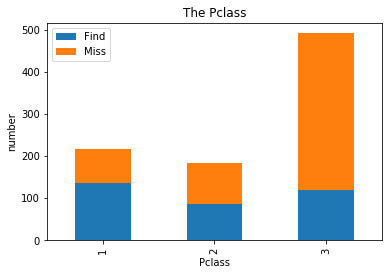

In [101]:
# So we just get close to know the dataset
# Pclass Sex SibSp Parch Embarked each of them we can visualize by bar figure
# let's visual it 

# Pclass effect the Survived
fig = plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
Survived_f = train_data.Pclass[train_data.Survived == 1].value_counts()
Survived_m = train_data.Pclass[train_data.Survived == 0].value_counts()
df = pd.DataFrame({"Find":Survived_f,
                   "Miss":Survived_m})
df.plot(kind="bar",stacked=True)
plt.title("The Pclass")
plt.xlabel("Pclass")
plt.ylabel("number")

Text(0,0.5,'number')

<Figure size 720x720 with 0 Axes>

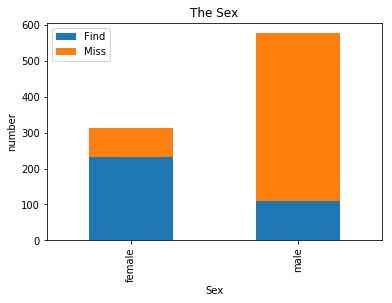

In [102]:
# Sex effect the Survived
fig = plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
Survived_f = train_data.Sex[train_data.Survived == 1].value_counts()
Survived_m = train_data.Sex[train_data.Survived == 0].value_counts()
df = pd.DataFrame({"Find":Survived_f,
                   "Miss":Survived_m})
df.plot(kind="bar",stacked=True)
plt.title("The Sex")
plt.xlabel("Sex")
plt.ylabel("number")

Text(0,0.5,'number')

<Figure size 720x720 with 0 Axes>

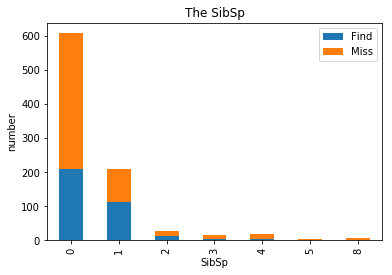

In [103]:
# SibSp effect the Survived
fig = plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
Survived_f = train_data.SibSp[train_data.Survived == 1].value_counts()
Survived_m = train_data.SibSp[train_data.Survived == 0].value_counts()
df = pd.DataFrame({"Find":Survived_f,
                   "Miss":Survived_m})
df.plot(kind="bar",stacked=True)
plt.title("The SibSp")
plt.xlabel("SibSp")
plt.ylabel("number")

Text(0,0.5,'number')

<Figure size 720x720 with 0 Axes>

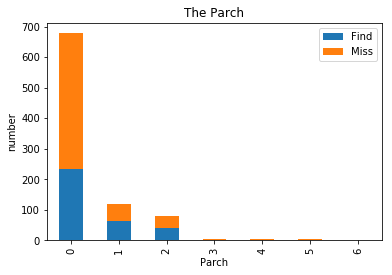

In [104]:
# Parch effect the Survived
fig = plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
Survived_f = train_data.Parch[train_data.Survived == 1].value_counts()
Survived_m = train_data.Parch[train_data.Survived == 0].value_counts()
df = pd.DataFrame({"Find":Survived_f,
                   "Miss":Survived_m})
df.plot(kind="bar",stacked=True)
plt.title("The Parch")
plt.xlabel("Parch")
plt.ylabel("number")

Text(0,0.5,'number')

<Figure size 720x720 with 0 Axes>

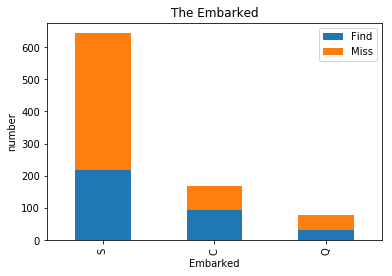

In [105]:
# Embarked effect the Survived
fig = plt.figure(figsize=(10,10))
fig.set(alpha=0.2)
Survived_f = train_data.Embarked[train_data.Survived == 1].value_counts()
Survived_m = train_data.Embarked[train_data.Survived == 0].value_counts()
df = pd.DataFrame({"Find":Survived_f,
                   "Miss":Survived_m})
df.plot(kind="bar",stacked=True)
plt.title("The Embarked")
plt.xlabel("Embarked")
plt.ylabel("number")

Text(0,0.5,'number')

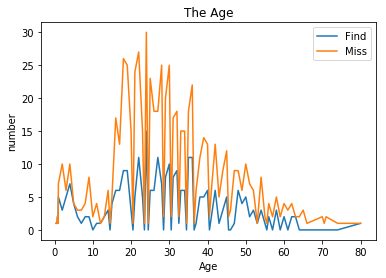

In [106]:
# There are some other feature we haven't visualize,but we have to do it in line figure
# Age Cabin Fare

# Age effect the Survived
fig.set(alpha=0.2)
Survived_f = train_data.Age[train_data.Survived == 1].value_counts()
Survived_m = train_data.Age[train_data.Survived == 0].value_counts()
df = pd.DataFrame({"Find":Survived_f,
                   "Miss":Survived_m})
df.plot(kind="line",stacked=True)
plt.title("The Age")
plt.xlabel("Age")
plt.ylabel("number")

Text(0,0.5,'number')

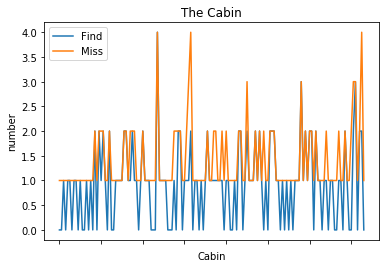

In [107]:
# Cabin effect the Survived
fig.set(alpha=0.2)
Survived_f = train_data.Cabin[train_data.Survived == 1].value_counts()
Survived_m = train_data.Cabin[train_data.Survived == 0].value_counts()
df = pd.DataFrame({"Find":Survived_f,
                   "Miss":Survived_m})
df.plot(kind="line",stacked=True)
plt.title("The Cabin")
plt.xlabel("Cabin")
plt.ylabel("number")

Text(0,0.5,'number')

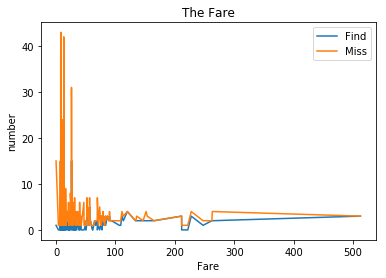

In [108]:
# Fare effect the Survived
fig.set(alpha=0.2)
Survived_f = train_data.Fare[train_data.Survived == 1].value_counts()
Survived_m = train_data.Fare[train_data.Survived == 0].value_counts()
df = pd.DataFrame({"Find":Survived_f,
                   "Miss":Survived_m})
df.plot(kind="line",stacked=True)
plt.title("The Fare")
plt.xlabel("Fare")
plt.ylabel("number")

In [109]:
# from above features we could find that 
# 1.Pclass↑ Survived↑
# 2.Female is likely to survived
# 3.Age SibSp Parch is not clear to know the relevance
# 4.Fare is not likely a linear dependence
# at last we use the corr to see clearly
corrDf = train_data.corr() 
print(corrDf)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [110]:
# and then we look all the features related to Survived
# the feature which is close to 0 is more unlikely have dependence to Survived
print(corrDf['Survived'].sort_values(ascending = False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [111]:
# from above we analysis,we can make a conlusion that 'PassengerId' and'SibSp' we can cut 
# and previously we have known 'Name' and 'Ticket' we can cut
# so next step we have to fill up the 'Age' and 'Cabin'

# 数据预处理

In [112]:
# here wee fill up the 'Age' and 'Cabin'
# use the cluster and the RandomforestRegression
# we have to use the numerical type data to make regression
# fill up the miss Age
from sklearn.ensemble import RandomForestRegressor

def fill_miss_age(df):
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
                
    # here we use the exist age to predict the unknow age
    known_age = age_df[age_df.Age.notnull()].as_matrix() 
                
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
                
    y = known_age[:,0]
                
    X = known_age[:,1:]
                
    rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
                
    rfr.fit(X,y)
                
    predictAge = rfr.predict(unknown_age[:,1:])
    df.loc[ (df.Age.isnull()), 'Age' ] = predictAge 
    return df,rfr
def fill_miss_cabin(df):
    df.loc[(df.Cabin.notnull()),'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()),'Cabin'] = 'No'
    return df
train_data,rfr = fill_miss_age(train_data)
train_data = fill_miss_cabin(train_data)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


# 特征工程

In [113]:
# Here we have to make all kind of each feature to be a indivisual feature
# We use the pd.get_dummies(train_data['Cabin'],prefix='Cabin')
dummies_Cabin = pd.get_dummies(train_data['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(train_data['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(train_data['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(train_data['Pclass'],prefix='Pclass')
conjuction = pd.concat([train_data,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)
conjuction.drop(['Pclass','Cabin','Embarked','Sex','Name','Ticket'],axis=1,inplace=True)
conjuction

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [114]:
conjuction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin_No       891 non-null uint8
Cabin_Yes      891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
dtypes: float64(2), int64(4), uint8(10)
memory usage: 50.5 KB


# 训练模型

In [115]:
#Here we use LogisticRegression to make the predict
from sklearn import linear_model
X = conjuction.loc[:,'Age':]
y = conjuction['Survived']
clf = linear_model.LogisticRegression(tol=1e-6)
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

# 对测试集数据进行训练

In [116]:
# We load the test data and process some feature to make it to fit with conjunction
test_data = pd.read_csv('../data/test.csv')
test_data.info()
# we know the data of test_data is not complete
# so we have to use the same way fill up them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [117]:
test_data.loc[ (test_data.Fare.isnull()), 'Fare' ] = 0
test_data,rfr = fill_miss_age(test_data)
test_data = fill_miss_cabin(test_data)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,No,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,No,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,No,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,No,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,No,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,No,S
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,No,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,No,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,No,C
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,No,S


In [123]:
# use the same way to add some feeatures and cut some features
dummies_Cabin = pd.get_dummies(test_data['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(test_data['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(test_data['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(test_data['Pclass'],prefix='Pclass')
last_data = pd.concat([test_data,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)
last_data.drop(['Name','Cabin','Sex','Pclass','Embarked','Ticket'],axis=1,inplace=True)
last_data

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1


# 对处理后的测试集预测

In [127]:
X = last_data.loc[:,'Age':]
predictions = clf.predict(X)
result = pd.DataFrame({'PassengerId':test_data['PassengerId'].as_matrix(),
                       'Survived':predictions})
result.to_csv('../data/test_prediction.csv',index=False)